In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
!pip install wordcloud

In [ ]:
df = pd.read_csv('final_data.csv')

Reading the head of the dataframe, we see that there are different columns such as textID, text, selected_text and the output that we are going to be predict which is sentiment respectively.

In [ ]:
df.head()

,tweets,labels
0,gas by my house hit going to chapel hill on sat,positive
1,theo walcott is still watch rafa and johnny de...,negative
2,its not that a gsp i just hate nick diaz wait ...,negative
3,iranian general says iron dome deal with their...,negative
4,mon amour obama tried to establish ties with t...,neutral


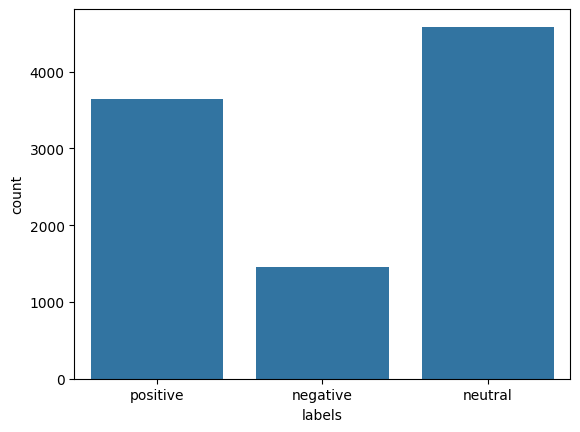

In [ ]:
sns.countplot(x = 'labels', data = df)
plt.show()

Taking a look at the shape of the data, we see that there are about 27k data points that we are going to be working and applying our knowledge.

In [ ]:
df.shape

(9684, 2)

In [ ]:
df['tweets'].iloc[0]

'gas by my house hit going to chapel hill on sat'

In [ ]:
len(df['tweets'].iloc[0])

47

In [ ]:
df['tweets'].head()

0      gas by my house hit going to chapel hill on sat
1    theo walcott is still watch rafa and johnny de...
2    its not that a gsp i just hate nick diaz wait ...
3    iranian general says iron dome deal with their...
4    mon amour obama tried to establish ties with t...
Name: tweets, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  9684 non-null   object
 1   labels  9684 non-null   object
dtypes: object(2)
memory usage: 151.4+ KB


In [ ]:
df['tweets'].iloc[0]

'gas by my house hit going to chapel hill on sat'

In [ ]:
text_length_list = []
for i in range(len(df)):
    if isinstance(df['tweets'].iloc[i], float) == True:
        print(df['tweets'].iloc[i])

In [ ]:
isinstance("danish", float)

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  9684 non-null   object
 1   labels  9684 non-null   object
dtypes: object(2)
memory usage: 151.4+ KB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9684 entries, 0 to 9683
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  9684 non-null   object
 1   labels  9684 non-null   object
dtypes: object(2)
memory usage: 151.4+ KB


In [ ]:
df['text_length'] = df['tweets'].apply(lambda x: len(x))

In [ ]:
df.head()

,tweets,labels,text_length
0,gas by my house hit going to chapel hill on sat,positive,47
1,theo walcott is still watch rafa and johnny de...,negative,69
2,its not that a gsp i just hate nick diaz wait ...,negative,58
3,iranian general says iron dome deal with their...,negative,108
4,mon amour obama tried to establish ties with t...,neutral,105


In [ ]:
df['text_words'] = df['tweets'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,tweets,labels,text_length,text_words
0,gas by my house hit going to chapel hill on sat,positive,47,11
1,theo walcott is still watch rafa and johnny de...,negative,69,13
2,its not that a gsp i just hate nick diaz wait ...,negative,58,13
3,iranian general says iron dome deal with their...,negative,108,20
4,mon amour obama tried to establish ties with t...,neutral,105,19


In [ ]:
## Taking separate dataframes for different values such as positive, negative and neutral reviews respectively.

positive_df = df[df['labels'] == 'positive']
negative_df = df[df['labels'] == 'negative']
neutral_df = df[df['labels'] == 'neutral']

In [ ]:
print("The shape of the dataframe that contains only the positive reviews is: {}".format(positive_df.shape))
print("The shape of the dataframe that contains only the negative reviews is: {}".format(negative_df.shape))
print("The shape of the dataframe that contains only the neutral reviews is:  {}".format(neutral_df.shape))

The shape of the dataframe that contains only the positive reviews is: (3640, 4)
The shape of the dataframe that contains only the negative reviews is: (1458, 4)
The shape of the dataframe that contains only the neutral reviews is:  (4586, 4)


In [ ]:
wordcloud = WordCloud(width = 500, height = 500)

In [ ]:
df.head()

,tweets,labels,text_length,text_words
0,gas by my house hit going to chapel hill on sat,positive,47,11
1,theo walcott is still watch rafa and johnny de...,negative,69,13
2,its not that a gsp i just hate nick diaz wait ...,negative,58,13
3,iranian general says iron dome deal with their...,negative,108,20
4,mon amour obama tried to establish ties with t...,neutral,105,19


In [ ]:
positive_df.head()

,tweets,labels,text_length,text_words
0,gas by my house hit going to chapel hill on sat,positive,47,11
6,with j davlar main rivals are team poland hope...,positive,119,23
12,oluoch victor otti kunjand i just watched it c...,positive,97,18
13,one of my best graders kory was excited after ...,positive,92,18
15,msshelahy i didnt want to just pop up but yep ...,positive,134,27


In [ ]:
positive_text = []
for i in range(len(positive_df)):
    positive_text.append(positive_df['tweets'].iloc[i])

In [ ]:
positive_text[:5]

['gas by my house hit going to chapel hill on sat',
 'with j davlar main rivals are team poland hopefully we an make it a successful end to a tough week of training tomorrow',
 'oluoch victor otti kunjand i just watched it comeback u remember her from the sun mornings on nta',
 'one of my best graders kory was excited after his touchdown today he did the victor cruz lol',
 'msshelahy i didnt want to just pop up but yep we have chapel hill next wednesday you should come and shes great ill tell her you asked']


Positive Text WordCloud

Worcloud gives us a good idea about the number of repeating words by the size of them. We see that there are some positive words such as "thank" and "good "which make up most of the positive reviews. There are also some words that occur quite rare such as "awesome" but these words also make a mark in the decisions respectively. In addition to this, we also find that there are very few words that are negative in the positive text. Therefore, we can conclude that words are a good indication of the polarity and sentiment of the text respectively.

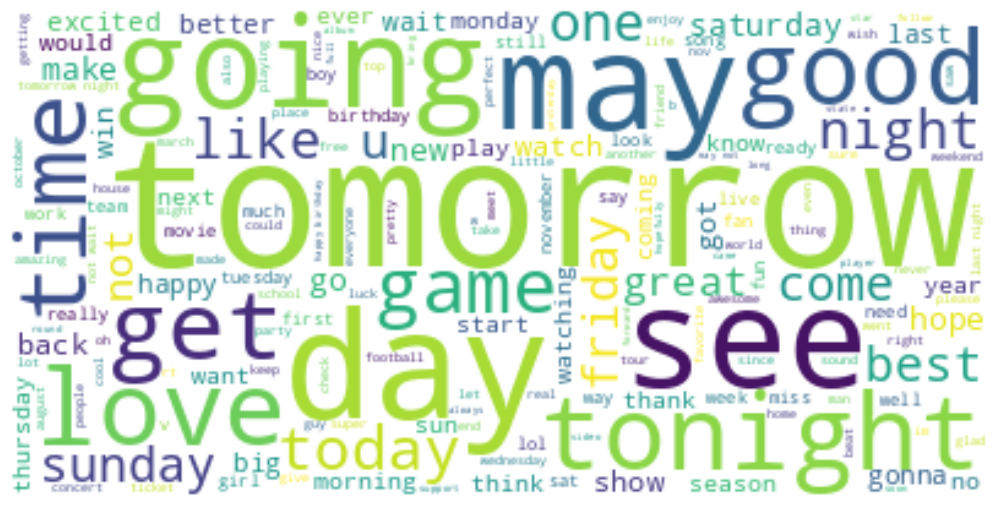

In [ ]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

#plt.style.use('seaborn')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(''.join(positive_text))
wordcloud.generate(''.join(positive_text))
#print(plt.style.available)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
negative_text = []
for i in range(len(negative_df)):
    negative_text.append(negative_df['tweets'].iloc[i])

In [ ]:
negative_text[0: 5]

['theo walcott is still watch rafa and johnny deal with him on saturday',
 'its not that a gsp i just hate nick diaz wait for february',
 'iranian general says iron dome deal with their missiles keep talking like that and we may end up finding out',
 'talking about deciding where i want to go to applying to colleges and everything about college stresses me out',
 'they may have a superbowl in but dallas winning a superbowl not with that quarterback and owner rasmussenpoll']

## Negative Text WordCloud

As can be seen in the wordcloud, there are some words such as "miss" and "no" which are considered to be negative respectively. In addition to this, we see that there are some words such as "work" and "sorry" that also tend to be negative as this is quite true in real-life where we say "sorry" for some negative things done and so on. Therefore, getting the wordcloud would ensure that we get to know the words present in the wordcloud dictionary and ensure that we understand the full context of the review respectively.


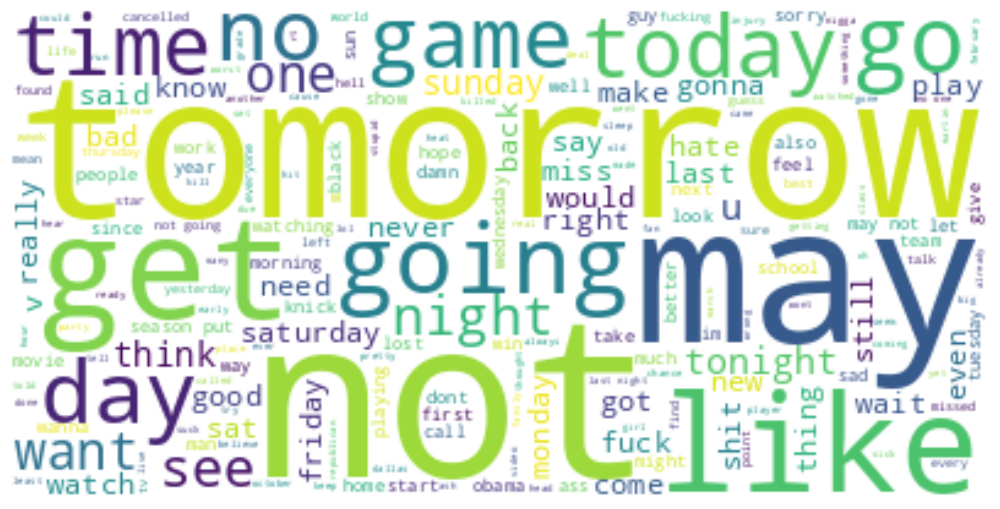

In [ ]:
wordcloud = WordCloud(stopwords = stopwords, background_color = 'white')
wordcloud.generate(''.join(negative_text))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,tweets,labels,text_length,text_words
0,gas by my house hit going to chapel hill on sat,positive,47,11
1,theo walcott is still watch rafa and johnny de...,negative,69,13
2,its not that a gsp i just hate nick diaz wait ...,negative,58,13
3,iranian general says iron dome deal with their...,negative,108,20
4,mon amour obama tried to establish ties with t...,neutral,105,19


In [ ]:
negative_df.head()

,tweets,labels,text_length,text_words
1,theo walcott is still watch rafa and johnny de...,negative,69,13
2,its not that a gsp i just hate nick diaz wait ...,negative,58,13
3,iranian general says iron dome deal with their...,negative,108,20
7,talking about deciding where i want to go to a...,negative,110,19
9,they may have a superbowl in but dallas winnin...,negative,109,18


In [ ]:
positive_df.head()

,tweets,labels,text_length,text_words
0,gas by my house hit going to chapel hill on sat,positive,47,11
6,with j davlar main rivals are team poland hope...,positive,119,23
12,oluoch victor otti kunjand i just watched it c...,positive,97,18
13,one of my best graders kory was excited after ...,positive,92,18
15,msshelahy i didnt want to just pop up but yep ...,positive,134,27


In [ ]:
df.head()

,tweets,labels,text_length,text_words
0,gas by my house hit going to chapel hill on sat,positive,47,11
1,theo walcott is still watch rafa and johnny de...,negative,69,13
2,its not that a gsp i just hate nick diaz wait ...,negative,58,13
3,iranian general says iron dome deal with their...,negative,108,20
4,mon amour obama tried to establish ties with t...,neutral,105,19


In [ ]:
X = df.drop(['labels'], axis = 1)
y = df['labels']

## Dividing the Data into Training and Cross Validation Data

Now we are going to be dividing the data into training and cross validation data and ensure that we understand the machine learning model well. We are going to be dividing the data into 2 parts where 70 percent of the data is taken as the training data and the 30 percent of the data would be taken as the test data. There is a random state assigned to it and split to ensure that we get a good accuracy.

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [ ]:
X_train.shape

(6778, 3)

In [ ]:
X_cv.shape

(2906, 3)

In [ ]:
!pip install tqdm

In [ ]:
X_train.head()

,tweets,text_length,text_words
4312,uconnvb wins fourth set take match next match ...,102,20
9473,way dope letting gregg williams go rams game m...,122,25
2431,hey washington senior senior portraits taken d...,103,17
2043,sat watching degrassi came realisation little ...,98,18
4418,aston villa must win game norwich city tomorro...,111,20


In [ ]:
X_cv.head()

,tweets,text_length,text_words
4317,omg guy cypress dressed sun drop guy lols,59,13
3069,stephanieearmen serious hawaii best vacation s...,105,17
6779,episodes family guy tonight put slight smile face,63,13
1592,played rugby yesterday may broken finger defin...,124,24
9076,skipping school tomorrow going tennessee inste...,70,9


In [ ]:
binarizer = LabelBinarizer()
y_train_converted = binarizer.fit_transform(y_train)
binarizer = LabelBinarizer()
y_cv_converted = binarizer.fit_transform(y_cv)

In [ ]:
y_cv_converted

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

## Tfidf Vectorizer

With the help of Tfidf Vectorizer, it is easy to convert the text into the form of vector based on the word frequency and the inverse document frequency and get those values which could be fed to the machine learning models for prediction respectively. Having a look at those values, we are going to be taking them and predicting using the machine learning approach.

In [ ]:
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train['tweets'])
X_cv_text = vectorizer.transform(X_cv['tweets'])

In [ ]:
X_train_text.shape

(6778, 15222)

In [ ]:
X_train_text[0: 5]

<5x15222 sparse matrix of type '<class 'numpy.float64'>'
	with 51 stored elements in Compressed Sparse Row format>

## Neural Network Model for Prediction

We are going to be defining the neural network model and predicting the chances of a person suffering from a heart disease. Taking a look at the data, we see that there are different activation units that we are going to be working with and then, we are going to use the categorical cross entropy as this is a multiclass classification problem. There can be more metrics that we might take but let us deal with accuracy for now and use the adam optimizer respectively.

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (20619,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
to_categorical(np.arange(1, 10))

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_train

4312     neutral
9473     neutral
2431     neutral
2043     neutral
4418    negative
          ...   
8262    positive
6214     neutral
8324    positive
6253     neutral
5600    positive
Name: labels, Length: 6778, dtype: object

We are now going to be converting the output values in a series format so that we can give these values to the neural network models that we would be working respectively.

In [ ]:
encoder = LabelEncoder()
y_train_converted = encoder.fit_transform(y_train)


In [ ]:
y_train_converted

array([1, 1, 1, ..., 2, 1, 2])

In [ ]:
y_train_final = to_categorical(y_train_converted)

In [ ]:
X_train.head()

,tweets,text_length,text_words
4312,uconnvb wins fourth set take match next match ...,102,20
9473,way dope letting gregg williams go rams game m...,122,25
2431,hey washington senior senior portraits taken d...,103,17
2043,sat watching degrassi came realisation little ...,98,18
4418,aston villa must win game norwich city tomorro...,111,20


In [ ]:
X_train_dropped = X_train.drop(['tweets'], axis = 1)

In [ ]:
X_train.head()

,tweets,text_length,text_words
4312,uconnvb wins fourth set take match next match ...,102,20
9473,way dope letting gregg williams go rams game m...,122,25
2431,hey washington senior senior portraits taken d...,103,17
2043,sat watching degrassi came realisation little ...,98,18
4418,aston villa must win game norwich city tomorro...,111,20


In [ ]:
X_train['tweets'].head()

4312    uconnvb wins fourth set take match next match ...
9473    way dope letting gregg williams go rams game m...
2431    hey washington senior senior portraits taken d...
2043    sat watching degrassi came realisation little ...
4418    aston villa must win game norwich city tomorro...
Name: tweets, dtype: object

In [ ]:
X_train_dropped = X_train.drop(['tweets'], axis = 1)

In [ ]:
X_train_dropped.head()

,text_length,text_words
4312,102,20
9473,122,25
2431,103,17
2043,98,18
4418,111,20


In [ ]:
X_cv.head()

,tweets,text_length,text_words
4317,omg guy cypress dressed sun drop guy lols,59,13
3069,stephanieearmen serious hawaii best vacation s...,105,17
6779,episodes family guy tonight put slight smile face,63,13
1592,played rugby yesterday may broken finger defin...,124,24
9076,skipping school tomorrow going tennessee inste...,70,9


In [ ]:
X_cv_dropped = X_cv.drop(['tweets'], axis = 1)

In [ ]:
X_cv_dropped.head()

,text_length,text_words
4317,59,13
3069,105,17
6779,63,13
1592,124,24
9076,70,9


In [ ]:
scaler = MinMaxScaler()
X_train_final = scaler.fit_transform(X_train_dropped)
X_cv_final = scaler.transform(X_cv_dropped)

In [ ]:
X_train_final[0: 5]

array([[0.67768595, 0.5862069 ],
       [0.84297521, 0.75862069],
       [0.68595041, 0.48275862],
       [0.6446281 , 0.51724138],
       [0.75206612, 0.5862069 ]])

In [ ]:
X_cv_final[0: 5]

array([[0.32231405, 0.34482759],
       [0.70247934, 0.48275862],
       [0.3553719 , 0.34482759],
       [0.85950413, 0.72413793],
       [0.41322314, 0.20689655]])

In [ ]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

encoder = LabelEncoder()
y_cv_encoded = encoder.fit_transform(y_cv)

In [ ]:
y_train_final = to_categorical(y_train_encoded)
y_cv_final = to_categorical(y_cv_encoded)

In [ ]:
y_train_final[0: 5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_cv_final[0: 5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
X_train_final[0: 5]

array([[0.67768595, 0.5862069 ],
       [0.84297521, 0.75862069],
       [0.68595041, 0.48275862],
       [0.6446281 , 0.51724138],
       [0.75206612, 0.5862069 ]])

In [ ]:
X_train.head()

,tweets,text_length,text_words
4312,uconnvb wins fourth set take match next match ...,102,20
9473,way dope letting gregg williams go rams game m...,122,25
2431,hey washington senior senior portraits taken d...,103,17
2043,sat watching degrassi came realisation little ...,98,18
4418,aston villa must win game norwich city tomorro...,111,20


In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['tweets'])
X_cv_vectorized = vectorizer.transform(X_cv['tweets'])

In [ ]:
X_train_vectorized

<6778x15222 sparse matrix of type '<class 'numpy.int64'>'
	with 70919 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_final[0: 5]

array([[0.67768595, 0.5862069 ],
       [0.84297521, 0.75862069],
       [0.68595041, 0.48275862],
       [0.6446281 , 0.51724138],
       [0.75206612, 0.5862069 ]])

In [ ]:
X_train_bow_toarray = X_train_vectorized.toarray()
X_cv_bow_toarray = X_cv_vectorized.toarray()

In [ ]:
X_train_new = np.concatenate((X_train_bow_toarray, X_train_final), axis = 1)
X_cv_new = np.concatenate((X_cv_bow_toarray, X_cv_final), axis = 1)

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')



In [ ]:
model.fit(X_train_new, y_train_final, epochs = 10, validation_data = (X_cv_new, y_cv_final))

Epoch 1/10
212/212 [==============================] - 9s 39ms/step - loss: 1.0309 - accuracy: 0.4637 - val_loss: 0.9200 - val_accuracy: 0.6056
Epoch 2/10
212/212 [==============================] - 7s 33ms/step - loss: 0.8400 - accuracy: 0.6472 - val_loss: 0.8439 - val_accuracy: 0.6198
Epoch 3/10
212/212 [==============================] - 6s 29ms/step - loss: 0.6148 - accuracy: 0.7598 - val_loss: 0.8793 - val_accuracy: 0.6401
Epoch 4/10
212/212 [==============================] - 7s 35ms/step - loss: 0.4040 - accuracy: 0.8491 - val_loss: 1.0374 - val_accuracy: 0.6335
Epoch 5/10
212/212 [==============================] - 7s 32ms/step - loss: 0.2668 - accuracy: 0.9066 - val_loss: 1.2669 - val_accuracy: 0.6373
Epoch 6/10
212/212 [==============================] - 7s 34ms/step - loss: 0.1846 - accuracy: 0.9464 - val_loss: 1.4000 - val_accuracy: 0.6325
Epoch 7/10
212/212 [==============================] - 6s 29ms/step - loss: 0.1300 - accuracy: 0.9616 - val_loss: 1.6683 - val_accuracy: 0.6297

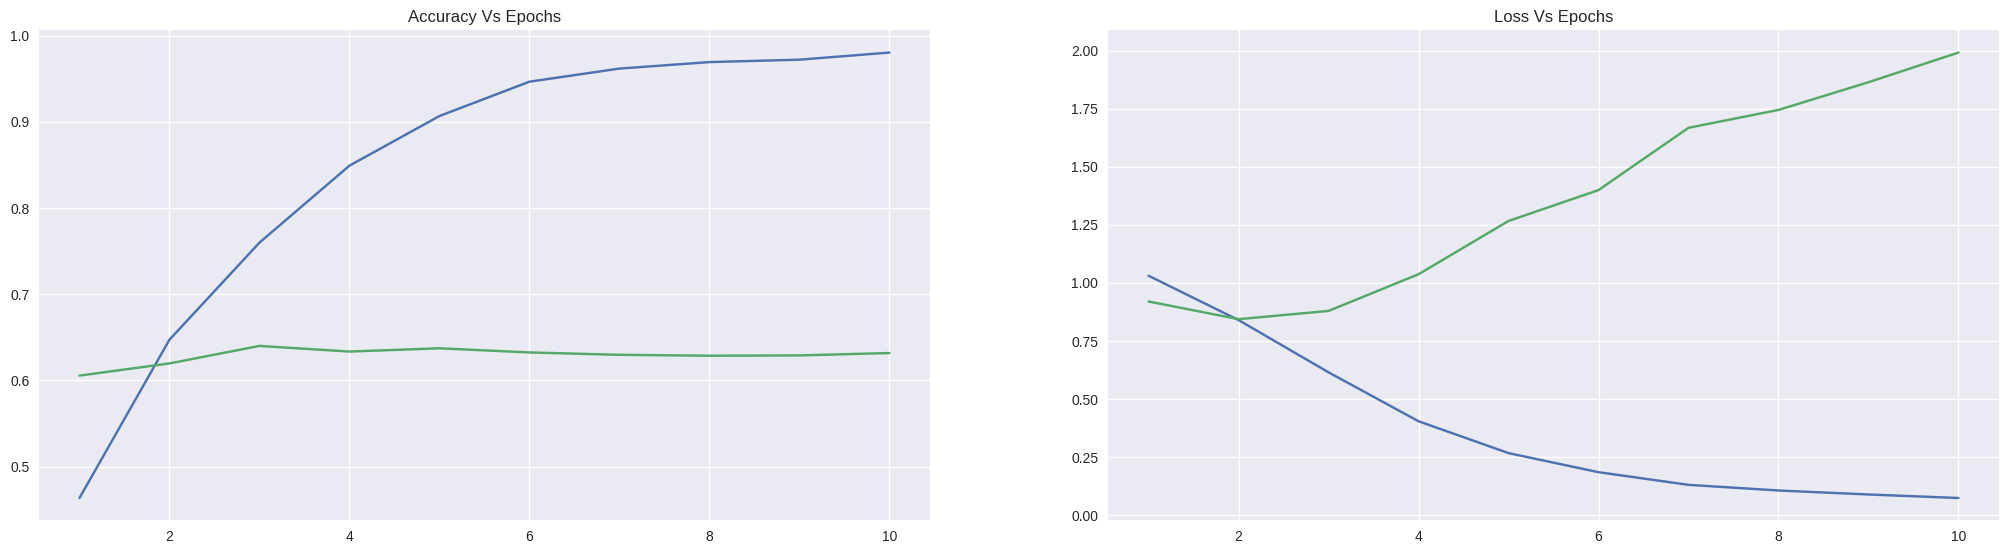

In [ ]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = np.arange(1, 11)
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.lineplot(x = epochs, y = accuracy, ax = ax[0])
sns.lineplot(x = epochs, y = val_accuracy, ax = ax[0])
ax[0].set_title('Accuracy Vs Epochs')
sns.lineplot(x = epochs, y = loss, ax = ax[1])
sns.lineplot(x = epochs, y = val_loss, ax = ax[1])
ax[1].set_title('Loss Vs Epochs')
plt.show()